In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [3]:
df_email = pd.read_csv('/content/spam (1).csv',encoding = 'latin-1')
df_email.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df_email_ = df_email[['v1','v2']]
df_email_.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df_email_.isna().sum()

,0
v1,0
v2,0


In [6]:
df_email_['v1'].value_counts()

,count
v1,
ham,4825
spam,747


In [7]:
df_email_['v2']

,v2
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will Ì_ b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, Input, InputLayer, RNN, SimpleRNN, LSTM, GRU, TimeDistributed
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf



import string

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns


from transformers import BertTokenizer, TFBertModel

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
def data_cleaning(text):

    # Lower the words in the sentence
    cleaned = text.lower()

    # Replace the full stop with a full stop and space
    cleaned = cleaned.replace(".", ". ")

    # Remove the stop words
    tokens = [word for word in cleaned.split() if not word in stop_words]

    # Remove the punctuations
    tokens = [tok.translate(str.maketrans(' ', ' ', string.punctuation)) for tok in tokens]

    # Joining the tokens back to form the sentence
    cleaned = " ".join(tokens)

    # Remove any extra spaces
    cleaned = cleaned.strip()

    return cleaned

In [11]:
for index, data in tqdm(df_email_.iterrows(), total=df_email_.shape[0]):
    df_email_.loc[index, 'v2'] = data_cleaning(data['v2'])
# df_email_['v2']

  0%|          | 0/5572 [00:00<?, ?it/s]/tmp/ipython-input-11-3167085814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_email_.loc[index, 'v2'] = data_cleaning(data['v2'])
100%|██████████| 5572/5572 [00:01<00:00, 3791.03it/s]


In [12]:
df_email_['v2']

,v2
0,go jurong point crazy available bugis n great...
1,ok lar joking wif u oni
2,free entry 2 wkly comp win fa cup final tkts 2...
3,u dun say early hor u c already say
4,nah think goes usf lives around though
...,...
5567,2nd time tried 2 contact u u å£750 pound prize...
5568,ì b going esplanade fr home
5569,pity mood that so suggestions
5570,guy bitching acted like interested buying some...


<Axes: ylabel='v2'>

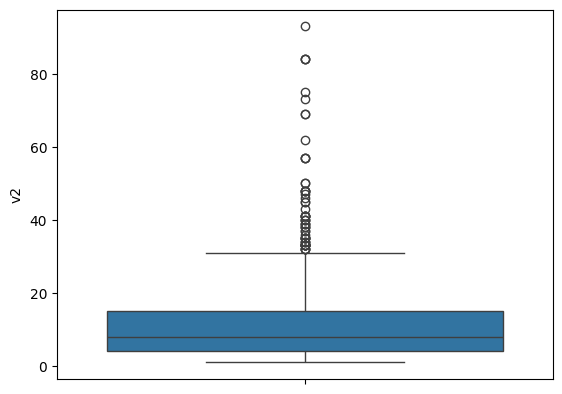

In [13]:
sns.boxplot(df_email_['v2'].str.split(" ").str.len())

In [14]:
max_sentence_len = df_email_['v2'].str.split(" ").str.len().max()
total_classes = df_email_.v1.nunique()

print(f"Maximum sequence length: {max_sentence_len}")
print(f"Total classes: {total_classes}")

Maximum sequence length: 93
Total classes: 2


In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [16]:
from transformers import TFBertModel, BertTokenizer
from tensorflow.keras.layers import  Dropout, Layer
from tensorflow.keras.models import Model

# Load pre-trained BERT
bert = TFBertModel.from_pretrained('bert-base-uncased')
bert.trainable = True  # Fine-tune if needed

class BertLayer(Layer):
    def __init__(self, **kwargs):
        super(BertLayer, self).__init__(**kwargs)
        self.bert = bert

    def call(self, inputs):
        return self.bert(inputs)[0]  # return last_hidden_state

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were 

In [17]:
# Define symbolic inputs
input_ids = Input(shape=(128,), dtype=tf.int32, name='input_ids')
attention_mask = Input(shape=(128,), dtype=tf.int32, name='attention_mask')

# Call wrapped BERT inside custom layer
bert_output = BertLayer()({'input_ids': input_ids, 'attention_mask': attention_mask})

# Take CLS token (first token)
cls_token = bert_output[:, 0, :]

In [18]:
Emotion_num = {name:i for i,name in enumerate(df_email_['v1'].unique())}
Emotion_num

{'ham': 0, 'spam': 1}

In [19]:
df_email_['v1_num'] = df_email_['v1'].apply(lambda x: Emotion_num[x])

/tmp/ipython-input-19-3667276022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_email_['v1_num'] = df_email_['v1'].apply(lambda x: Emotion_num[x])


In [20]:
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df_email_['v2'], df_email_['v1_num'], test_size=0.25, random_state=42, stratify=df_email_['v1_num']
)

In [21]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

train_encodings = tokenizer(
    list(train_texts), padding='max_length', truncation=True, max_length=128, return_tensors='tf'
)

val_encodings = tokenizer(
    list(val_texts), padding='max_length', truncation=True, max_length=128, return_tensors='tf'
)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


In [22]:
train_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'input_ids': train_encodings['input_ids'],
        'attention_mask': train_encodings['attention_mask']
    },
    train_labels
)).shuffle(100).batch(4)

val_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'input_ids': val_encodings['input_ids'],
        'attention_mask': val_encodings['attention_mask']
    },
    val_labels
)).batch(4)

In [ ]:
# Add classification head
x = Dense(128, activation='relu')(cls_token)
x = Dropout(0.3)(x)
output = Dense(2, activation='softmax')(x)

# Final model
model = Model(inputs=[input_ids, attention_mask], outputs=output)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

In [25]:
summary = model.fit(train_dataset, validation_data=val_dataset, epochs=3)

Epoch 1/3
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 2709s 3s/step - accuracy: 0.8852 - loss: 0.3286 - val_accuracy: 0.9612 - val_loss: 0.1359
Epoch 2/3
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 2691s 3s/step - accuracy: 0.9626 - loss: 0.1280 - val_accuracy: 0.9742 - val_loss: 0.0901
Epoch 3/3
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 2666s 3s/step - accuracy: 0.9727 - loss: 0.0922 - val_accuracy: 0.9777 - val_loss: 0.0764


In [26]:
predictions = model.predict({
    'input_ids': val_encodings['input_ids'],
    'attention_mask': val_encodings['attention_mask']
})

44/44 ━━━━━━━━━━━━━━━━━━━━ 665s 15s/step


In [27]:
predicted_classes = np.argmax(predictions, axis=1)

for text, pred in zip(val_texts.to_list(), predicted_classes):
    print(f"Text: {text}")
    print(f"Predicted Class: {pred}")
    print("----------")
    break

Text: left already orchard now
Predicted Class: 0
----------


In [28]:
# y_pred_nb = nb.predict(X_val)
accuracy_score(val_labels, predicted_classes)

0.9777458722182341

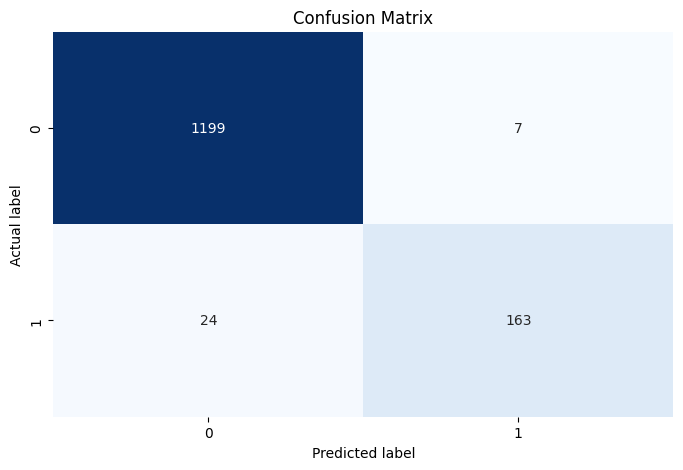

In [29]:
cm = confusion_matrix(val_labels, predicted_classes)

plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()